## Logic Based FizzBuzz Function [Software 1.0]

In [149]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [150]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [151]:
def processData(dataset):
    
    # Why do we have to process?
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [152]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [153]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [154]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # Why use Dense layer and then activation?
    # Why use sequential model with layers?
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    
    model.summary()
    
    # Why use categorical_crossentropy?
    model.compile(optimizer='adadelta',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [155]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [156]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               2816      
_________________________________________________________________
activation_27 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 1028      
_________________________________________________________________
activation_28 (Activation)   (None, 4)                 0         
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [157]:
validation_data_split = 0.2
num_epochs = 2000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    #, callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/2000
720/720 [==============================] - 1s 1ms/step - loss: 1.3749 - acc: 0.3236 - val_loss: 1.2218 - val_acc: 0.5333
Epoch 2/2000
720/720 [==============================] - 0s 49us/step - loss: 1.2243 - acc: 0.5208 - val_loss: 1.1526 - val_acc: 0.5333
Epoch 3/2000
720/720 [==============================] - 0s 47us/step - loss: 1.1720 - acc: 0.5333 - val_loss: 1.1449 - val_acc: 0.5333
Epoch 4/2000
720/720 [==============================] - 0s 55us/step - loss: 1.1623 - acc: 0.5333 - val_loss: 1.1438 - val_acc: 0.5333
Epoch 5/2000
720/720 [==============================] - 0s 47us/step - loss: 1.1549 - acc: 0.5333 - val_loss: 1.1451 - val_acc: 0.5333
Epoch 6/2000
720/720 [==============================] - 0s 44us/step - loss: 1.1508 - acc: 0.5333 - val_loss: 1.1484 - val_acc: 0.5333
Epoch 7/2000
720/720 [==============================] - 0s 51us/step - loss: 1.1549 - acc: 0.5333 - val_loss: 1.1450 - val_acc: 0.5333
Epoch 8/20

Epoch 61/2000
720/720 [==============================] - 0s 47us/step - loss: 1.0708 - acc: 0.5389 - val_loss: 1.1266 - val_acc: 0.5389
Epoch 62/2000
720/720 [==============================] - 0s 48us/step - loss: 1.0635 - acc: 0.5333 - val_loss: 1.1254 - val_acc: 0.5389
Epoch 63/2000
720/720 [==============================] - 0s 48us/step - loss: 1.0608 - acc: 0.5444 - val_loss: 1.1215 - val_acc: 0.5389
Epoch 64/2000
720/720 [==============================] - 0s 47us/step - loss: 1.0606 - acc: 0.5389 - val_loss: 1.1203 - val_acc: 0.5333
Epoch 65/2000
720/720 [==============================] - 0s 49us/step - loss: 1.0549 - acc: 0.5347 - val_loss: 1.1189 - val_acc: 0.5389
Epoch 66/2000
720/720 [==============================] - 0s 48us/step - loss: 1.0496 - acc: 0.5458 - val_loss: 1.1189 - val_acc: 0.5389
Epoch 67/2000
720/720 [==============================] - 0s 50us/step - loss: 1.0520 - acc: 0.5389 - val_loss: 1.1177 - val_acc: 0.5389
Epoch 68/2000
720/720 [=========================

Epoch 121/2000
720/720 [==============================] - 0s 46us/step - loss: 0.8885 - acc: 0.5944 - val_loss: 1.0269 - val_acc: 0.5611
Epoch 122/2000
720/720 [==============================] - 0s 45us/step - loss: 0.8780 - acc: 0.6181 - val_loss: 1.0243 - val_acc: 0.5556
Epoch 123/2000
720/720 [==============================] - 0s 51us/step - loss: 0.8802 - acc: 0.6125 - val_loss: 1.0235 - val_acc: 0.5556
Epoch 124/2000
720/720 [==============================] - 0s 47us/step - loss: 0.8763 - acc: 0.6097 - val_loss: 1.0214 - val_acc: 0.5611
Epoch 125/2000
720/720 [==============================] - 0s 48us/step - loss: 0.8735 - acc: 0.6167 - val_loss: 1.0169 - val_acc: 0.5556
Epoch 126/2000
720/720 [==============================] - 0s 45us/step - loss: 0.8738 - acc: 0.6111 - val_loss: 1.0191 - val_acc: 0.5556
Epoch 127/2000
720/720 [==============================] - 0s 49us/step - loss: 0.8757 - acc: 0.6125 - val_loss: 1.0206 - val_acc: 0.5556
Epoch 128/2000
720/720 [=================

Epoch 181/2000
720/720 [==============================] - 0s 48us/step - loss: 0.7321 - acc: 0.7222 - val_loss: 0.9270 - val_acc: 0.6333
Epoch 182/2000
720/720 [==============================] - 0s 43us/step - loss: 0.7315 - acc: 0.7236 - val_loss: 0.9152 - val_acc: 0.6278
Epoch 183/2000
720/720 [==============================] - 0s 47us/step - loss: 0.7285 - acc: 0.7361 - val_loss: 0.9313 - val_acc: 0.5889
Epoch 184/2000
720/720 [==============================] - 0s 52us/step - loss: 0.7131 - acc: 0.7306 - val_loss: 0.9135 - val_acc: 0.6222
Epoch 185/2000
720/720 [==============================] - 0s 47us/step - loss: 0.7099 - acc: 0.7139 - val_loss: 0.9117 - val_acc: 0.6278
Epoch 186/2000
720/720 [==============================] - 0s 53us/step - loss: 0.7187 - acc: 0.7250 - val_loss: 0.9123 - val_acc: 0.6333
Epoch 187/2000
720/720 [==============================] - 0s 45us/step - loss: 0.7060 - acc: 0.7250 - val_loss: 0.9098 - val_acc: 0.6222
Epoch 188/2000
720/720 [=================

Epoch 241/2000
720/720 [==============================] - 0s 47us/step - loss: 0.6273 - acc: 0.7681 - val_loss: 0.8192 - val_acc: 0.6722
Epoch 242/2000
720/720 [==============================] - 0s 51us/step - loss: 0.6263 - acc: 0.7861 - val_loss: 0.8173 - val_acc: 0.7056
Epoch 243/2000
720/720 [==============================] - 0s 50us/step - loss: 0.6302 - acc: 0.7653 - val_loss: 0.8261 - val_acc: 0.7056
Epoch 244/2000
720/720 [==============================] - 0s 50us/step - loss: 0.6047 - acc: 0.7917 - val_loss: 0.8183 - val_acc: 0.7056
Epoch 245/2000
720/720 [==============================] - 0s 48us/step - loss: 0.6073 - acc: 0.7833 - val_loss: 0.8212 - val_acc: 0.6944
Epoch 246/2000
720/720 [==============================] - 0s 43us/step - loss: 0.6086 - acc: 0.7819 - val_loss: 0.8169 - val_acc: 0.6944
Epoch 247/2000
720/720 [==============================] - 0s 50us/step - loss: 0.6386 - acc: 0.7847 - val_loss: 0.8224 - val_acc: 0.6611
Epoch 248/2000
720/720 [=================

Epoch 301/2000
720/720 [==============================] - 0s 48us/step - loss: 0.5508 - acc: 0.8028 - val_loss: 0.7550 - val_acc: 0.7056
Epoch 302/2000
720/720 [==============================] - 0s 43us/step - loss: 0.5649 - acc: 0.8111 - val_loss: 0.7704 - val_acc: 0.6500
Epoch 303/2000
720/720 [==============================] - 0s 48us/step - loss: 0.5637 - acc: 0.8139 - val_loss: 0.7647 - val_acc: 0.6611
Epoch 304/2000
720/720 [==============================] - 0s 48us/step - loss: 0.5465 - acc: 0.8000 - val_loss: 0.7491 - val_acc: 0.7278
Epoch 305/2000
720/720 [==============================] - 0s 46us/step - loss: 0.5428 - acc: 0.8139 - val_loss: 0.7526 - val_acc: 0.7056
Epoch 306/2000
720/720 [==============================] - 0s 47us/step - loss: 0.5609 - acc: 0.8083 - val_loss: 0.7475 - val_acc: 0.7222
Epoch 307/2000
720/720 [==============================] - 0s 47us/step - loss: 0.5334 - acc: 0.8222 - val_loss: 0.7441 - val_acc: 0.7222
Epoch 308/2000
720/720 [=================

Epoch 361/2000
720/720 [==============================] - 0s 48us/step - loss: 0.5188 - acc: 0.8306 - val_loss: 0.6906 - val_acc: 0.7333
Epoch 362/2000
720/720 [==============================] - 0s 46us/step - loss: 0.4520 - acc: 0.8514 - val_loss: 0.6953 - val_acc: 0.7500
Epoch 363/2000
720/720 [==============================] - 0s 48us/step - loss: 0.4938 - acc: 0.8264 - val_loss: 0.6980 - val_acc: 0.7389
Epoch 364/2000
720/720 [==============================] - 0s 50us/step - loss: 0.5030 - acc: 0.8347 - val_loss: 0.6955 - val_acc: 0.7333
Epoch 365/2000
720/720 [==============================] - 0s 48us/step - loss: 0.4811 - acc: 0.8306 - val_loss: 0.7079 - val_acc: 0.7056
Epoch 366/2000
720/720 [==============================] - 0s 51us/step - loss: 0.4951 - acc: 0.8250 - val_loss: 0.6886 - val_acc: 0.7278
Epoch 367/2000
720/720 [==============================] - 0s 48us/step - loss: 0.4803 - acc: 0.8375 - val_loss: 0.7013 - val_acc: 0.6944
Epoch 368/2000
720/720 [=================

Epoch 421/2000
720/720 [==============================] - 0s 46us/step - loss: 0.4409 - acc: 0.8431 - val_loss: 0.6489 - val_acc: 0.7389
Epoch 422/2000
720/720 [==============================] - 0s 51us/step - loss: 0.4633 - acc: 0.8500 - val_loss: 0.6611 - val_acc: 0.7278
Epoch 423/2000
720/720 [==============================] - 0s 48us/step - loss: 0.4282 - acc: 0.8472 - val_loss: 0.6808 - val_acc: 0.7111
Epoch 424/2000
720/720 [==============================] - 0s 48us/step - loss: 0.4622 - acc: 0.8250 - val_loss: 0.6572 - val_acc: 0.7111
Epoch 425/2000
720/720 [==============================] - 0s 48us/step - loss: 0.4583 - acc: 0.8347 - val_loss: 0.6493 - val_acc: 0.7444
Epoch 426/2000
720/720 [==============================] - 0s 45us/step - loss: 0.4815 - acc: 0.8347 - val_loss: 0.6644 - val_acc: 0.6944
Epoch 427/2000
720/720 [==============================] - 0s 45us/step - loss: 0.4573 - acc: 0.8208 - val_loss: 0.6455 - val_acc: 0.7778
Epoch 428/2000
720/720 [=================

Epoch 481/2000
720/720 [==============================] - 0s 47us/step - loss: 0.4234 - acc: 0.8444 - val_loss: 0.6335 - val_acc: 0.7389
Epoch 482/2000
720/720 [==============================] - 0s 47us/step - loss: 0.4162 - acc: 0.8736 - val_loss: 0.6454 - val_acc: 0.7389
Epoch 483/2000
720/720 [==============================] - 0s 47us/step - loss: 0.4007 - acc: 0.8722 - val_loss: 0.6367 - val_acc: 0.7444
Epoch 484/2000
720/720 [==============================] - 0s 51us/step - loss: 0.4264 - acc: 0.8403 - val_loss: 0.6487 - val_acc: 0.7278
Epoch 485/2000
720/720 [==============================] - 0s 48us/step - loss: 0.4272 - acc: 0.8431 - val_loss: 0.6117 - val_acc: 0.7833
Epoch 486/2000
720/720 [==============================] - 0s 48us/step - loss: 0.4510 - acc: 0.8347 - val_loss: 0.6146 - val_acc: 0.7722
Epoch 487/2000
720/720 [==============================] - 0s 51us/step - loss: 0.4170 - acc: 0.8625 - val_loss: 0.6141 - val_acc: 0.7667
Epoch 488/2000
720/720 [=================

Epoch 541/2000
720/720 [==============================] - 0s 44us/step - loss: 0.4130 - acc: 0.8500 - val_loss: 0.6291 - val_acc: 0.7389
Epoch 542/2000
720/720 [==============================] - 0s 45us/step - loss: 0.4222 - acc: 0.8583 - val_loss: 0.5890 - val_acc: 0.7889
Epoch 543/2000
720/720 [==============================] - 0s 47us/step - loss: 0.4364 - acc: 0.8528 - val_loss: 0.5931 - val_acc: 0.7833
Epoch 544/2000
720/720 [==============================] - 0s 49us/step - loss: 0.4206 - acc: 0.8472 - val_loss: 0.6041 - val_acc: 0.7667
Epoch 545/2000
720/720 [==============================] - 0s 48us/step - loss: 0.3921 - acc: 0.8639 - val_loss: 0.6149 - val_acc: 0.7222
Epoch 546/2000
720/720 [==============================] - 0s 50us/step - loss: 0.4143 - acc: 0.8611 - val_loss: 0.6054 - val_acc: 0.7222
Epoch 547/2000
720/720 [==============================] - 0s 45us/step - loss: 0.4241 - acc: 0.8486 - val_loss: 0.6152 - val_acc: 0.7667
Epoch 548/2000
720/720 [=================

Epoch 601/2000
720/720 [==============================] - 0s 49us/step - loss: 0.3755 - acc: 0.8694 - val_loss: 0.5791 - val_acc: 0.7611
Epoch 602/2000
720/720 [==============================] - 0s 44us/step - loss: 0.3724 - acc: 0.8625 - val_loss: 0.5564 - val_acc: 0.7944
Epoch 603/2000
720/720 [==============================] - 0s 47us/step - loss: 0.3974 - acc: 0.8639 - val_loss: 0.6090 - val_acc: 0.7278
Epoch 604/2000
720/720 [==============================] - 0s 50us/step - loss: 0.4040 - acc: 0.8542 - val_loss: 0.5864 - val_acc: 0.7667
Epoch 605/2000
720/720 [==============================] - 0s 55us/step - loss: 0.3971 - acc: 0.8653 - val_loss: 0.5741 - val_acc: 0.7667
Epoch 606/2000
720/720 [==============================] - 0s 47us/step - loss: 0.3952 - acc: 0.8625 - val_loss: 0.5901 - val_acc: 0.7389
Epoch 607/2000
720/720 [==============================] - 0s 51us/step - loss: 0.4059 - acc: 0.8500 - val_loss: 0.5540 - val_acc: 0.8056
Epoch 608/2000
720/720 [=================

Epoch 661/2000
720/720 [==============================] - 0s 44us/step - loss: 0.4081 - acc: 0.8611 - val_loss: 0.5767 - val_acc: 0.7500
Epoch 662/2000
720/720 [==============================] - 0s 45us/step - loss: 0.3688 - acc: 0.8736 - val_loss: 0.5998 - val_acc: 0.7222
Epoch 663/2000
720/720 [==============================] - 0s 48us/step - loss: 0.3917 - acc: 0.8542 - val_loss: 0.5800 - val_acc: 0.7278
Epoch 664/2000
720/720 [==============================] - 0s 47us/step - loss: 0.3813 - acc: 0.8639 - val_loss: 0.5606 - val_acc: 0.7667
Epoch 665/2000
720/720 [==============================] - 0s 45us/step - loss: 0.3845 - acc: 0.8486 - val_loss: 0.5623 - val_acc: 0.7667
Epoch 666/2000
720/720 [==============================] - 0s 45us/step - loss: 0.3670 - acc: 0.8722 - val_loss: 0.5933 - val_acc: 0.7278
Epoch 667/2000
720/720 [==============================] - 0s 49us/step - loss: 0.4075 - acc: 0.8514 - val_loss: 0.5461 - val_acc: 0.8111
Epoch 668/2000
720/720 [=================

Epoch 721/2000
720/720 [==============================] - 0s 46us/step - loss: 0.3724 - acc: 0.8569 - val_loss: 0.5673 - val_acc: 0.7500
Epoch 722/2000
720/720 [==============================] - 0s 42us/step - loss: 0.3679 - acc: 0.8667 - val_loss: 0.6020 - val_acc: 0.7611
Epoch 723/2000
720/720 [==============================] - 0s 48us/step - loss: 0.3763 - acc: 0.8639 - val_loss: 0.5871 - val_acc: 0.7611
Epoch 724/2000
720/720 [==============================] - 0s 50us/step - loss: 0.3320 - acc: 0.8847 - val_loss: 0.5694 - val_acc: 0.7611
Epoch 725/2000
720/720 [==============================] - 0s 49us/step - loss: 0.4178 - acc: 0.8361 - val_loss: 0.6069 - val_acc: 0.7278
Epoch 726/2000
720/720 [==============================] - 0s 44us/step - loss: 0.4079 - acc: 0.8597 - val_loss: 0.5523 - val_acc: 0.7667
Epoch 727/2000
720/720 [==============================] - 0s 47us/step - loss: 0.3582 - acc: 0.8708 - val_loss: 0.5689 - val_acc: 0.7667
Epoch 728/2000
720/720 [=================

Epoch 781/2000
720/720 [==============================] - 0s 45us/step - loss: 0.3686 - acc: 0.8736 - val_loss: 0.5479 - val_acc: 0.7667
Epoch 782/2000
720/720 [==============================] - 0s 48us/step - loss: 0.3437 - acc: 0.8833 - val_loss: 0.5756 - val_acc: 0.7444
Epoch 783/2000
720/720 [==============================] - 0s 48us/step - loss: 0.3532 - acc: 0.8597 - val_loss: 0.5540 - val_acc: 0.7444
Epoch 784/2000
720/720 [==============================] - 0s 47us/step - loss: 0.3383 - acc: 0.8736 - val_loss: 0.5319 - val_acc: 0.7944
Epoch 785/2000
720/720 [==============================] - 0s 48us/step - loss: 0.3553 - acc: 0.8694 - val_loss: 0.5305 - val_acc: 0.7944
Epoch 786/2000
720/720 [==============================] - 0s 50us/step - loss: 0.3302 - acc: 0.8875 - val_loss: 0.5564 - val_acc: 0.7500
Epoch 787/2000
720/720 [==============================] - 0s 50us/step - loss: 0.3609 - acc: 0.8694 - val_loss: 0.5501 - val_acc: 0.7611
Epoch 788/2000
720/720 [=================

Epoch 841/2000
720/720 [==============================] - 0s 50us/step - loss: 0.3378 - acc: 0.8722 - val_loss: 0.5634 - val_acc: 0.7833
Epoch 842/2000
720/720 [==============================] - 0s 49us/step - loss: 0.3830 - acc: 0.8569 - val_loss: 0.5262 - val_acc: 0.7944
Epoch 843/2000
720/720 [==============================] - 0s 47us/step - loss: 0.3619 - acc: 0.8722 - val_loss: 0.5288 - val_acc: 0.7944
Epoch 844/2000
720/720 [==============================] - 0s 48us/step - loss: 0.3499 - acc: 0.8778 - val_loss: 0.5429 - val_acc: 0.7722
Epoch 845/2000
720/720 [==============================] - 0s 55us/step - loss: 0.3618 - acc: 0.8681 - val_loss: 0.5317 - val_acc: 0.7778
Epoch 846/2000
720/720 [==============================] - 0s 49us/step - loss: 0.3745 - acc: 0.8681 - val_loss: 0.5483 - val_acc: 0.7667
Epoch 847/2000
720/720 [==============================] - 0s 48us/step - loss: 0.3568 - acc: 0.8694 - val_loss: 0.5400 - val_acc: 0.7889
Epoch 848/2000
720/720 [=================

Epoch 901/2000
720/720 [==============================] - 0s 28us/step - loss: 0.3617 - acc: 0.8625 - val_loss: 0.5419 - val_acc: 0.7778
Epoch 902/2000
720/720 [==============================] - 0s 33us/step - loss: 0.3754 - acc: 0.8500 - val_loss: 0.5456 - val_acc: 0.7833
Epoch 903/2000
720/720 [==============================] - 0s 30us/step - loss: 0.3508 - acc: 0.8667 - val_loss: 0.5558 - val_acc: 0.7667
Epoch 904/2000
720/720 [==============================] - 0s 24us/step - loss: 0.3380 - acc: 0.8708 - val_loss: 0.5299 - val_acc: 0.7833
Epoch 905/2000
720/720 [==============================] - 0s 21us/step - loss: 0.3985 - acc: 0.8514 - val_loss: 0.5344 - val_acc: 0.7667
Epoch 906/2000
720/720 [==============================] - 0s 23us/step - loss: 0.3500 - acc: 0.8833 - val_loss: 0.5569 - val_acc: 0.7611
Epoch 907/2000
720/720 [==============================] - 0s 21us/step - loss: 0.3690 - acc: 0.8639 - val_loss: 0.5056 - val_acc: 0.8167
Epoch 908/2000
720/720 [=================

Epoch 961/2000
720/720 [==============================] - 0s 33us/step - loss: 0.3414 - acc: 0.8708 - val_loss: 0.5476 - val_acc: 0.7667
Epoch 962/2000
720/720 [==============================] - 0s 38us/step - loss: 0.3210 - acc: 0.8903 - val_loss: 0.5618 - val_acc: 0.7611
Epoch 963/2000
720/720 [==============================] - 0s 35us/step - loss: 0.3485 - acc: 0.8764 - val_loss: 0.5542 - val_acc: 0.7722
Epoch 964/2000
720/720 [==============================] - 0s 33us/step - loss: 0.3407 - acc: 0.8736 - val_loss: 0.5790 - val_acc: 0.7444
Epoch 965/2000
720/720 [==============================] - 0s 33us/step - loss: 0.3216 - acc: 0.8778 - val_loss: 0.5336 - val_acc: 0.8000
Epoch 966/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3457 - acc: 0.8778 - val_loss: 0.5179 - val_acc: 0.8056
Epoch 967/2000
720/720 [==============================] - 0s 35us/step - loss: 0.3578 - acc: 0.8681 - val_loss: 0.5341 - val_acc: 0.7944
Epoch 968/2000
720/720 [=================

720/720 [==============================] - 0s 35us/step - loss: 0.3478 - acc: 0.8667 - val_loss: 0.4815 - val_acc: 0.8778
Epoch 1021/2000
720/720 [==============================] - 0s 36us/step - loss: 0.3082 - acc: 0.8972 - val_loss: 0.5261 - val_acc: 0.7889
Epoch 1022/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3662 - acc: 0.8569 - val_loss: 0.5444 - val_acc: 0.7667
Epoch 1023/2000
720/720 [==============================] - 0s 37us/step - loss: 0.3487 - acc: 0.8625 - val_loss: 0.5432 - val_acc: 0.7778
Epoch 1024/2000
720/720 [==============================] - 0s 37us/step - loss: 0.3280 - acc: 0.8903 - val_loss: 0.4937 - val_acc: 0.8389
Epoch 1025/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3267 - acc: 0.8875 - val_loss: 0.5266 - val_acc: 0.7778
Epoch 1026/2000
720/720 [==============================] - 0s 33us/step - loss: 0.3339 - acc: 0.8736 - val_loss: 0.5325 - val_acc: 0.7889
Epoch 1027/2000
720/720 [=========================

720/720 [==============================] - 0s 27us/step - loss: 0.2852 - acc: 0.8931 - val_loss: 0.4919 - val_acc: 0.8389
Epoch 1080/2000
720/720 [==============================] - 0s 27us/step - loss: 0.3105 - acc: 0.8917 - val_loss: 0.4943 - val_acc: 0.8167
Epoch 1081/2000
720/720 [==============================] - 0s 26us/step - loss: 0.3244 - acc: 0.8833 - val_loss: 0.5305 - val_acc: 0.8000
Epoch 1082/2000
720/720 [==============================] - 0s 28us/step - loss: 0.3041 - acc: 0.8931 - val_loss: 0.5510 - val_acc: 0.7667
Epoch 1083/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3118 - acc: 0.8958 - val_loss: 0.5392 - val_acc: 0.7722
Epoch 1084/2000
720/720 [==============================] - 0s 27us/step - loss: 0.3455 - acc: 0.8625 - val_loss: 0.5414 - val_acc: 0.8000
Epoch 1085/2000
720/720 [==============================] - 0s 27us/step - loss: 0.3684 - acc: 0.8750 - val_loss: 0.5346 - val_acc: 0.8000
Epoch 1086/2000
720/720 [=========================

720/720 [==============================] - 0s 37us/step - loss: 0.3028 - acc: 0.9056 - val_loss: 0.6030 - val_acc: 0.7500
Epoch 1139/2000
720/720 [==============================] - 0s 36us/step - loss: 0.3094 - acc: 0.8736 - val_loss: 0.5134 - val_acc: 0.8000
Epoch 1140/2000
720/720 [==============================] - 0s 39us/step - loss: 0.3008 - acc: 0.8889 - val_loss: 0.5329 - val_acc: 0.8056
Epoch 1141/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3146 - acc: 0.8958 - val_loss: 0.5391 - val_acc: 0.7944
Epoch 1142/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3390 - acc: 0.8792 - val_loss: 0.5166 - val_acc: 0.8000
Epoch 1143/2000
720/720 [==============================] - 0s 36us/step - loss: 0.3149 - acc: 0.8875 - val_loss: 0.5309 - val_acc: 0.7889
Epoch 1144/2000
720/720 [==============================] - 0s 33us/step - loss: 0.3048 - acc: 0.8931 - val_loss: 0.5385 - val_acc: 0.7833
Epoch 1145/2000
720/720 [=========================

720/720 [==============================] - 0s 36us/step - loss: 0.3168 - acc: 0.8819 - val_loss: 0.5414 - val_acc: 0.7833
Epoch 1198/2000
720/720 [==============================] - 0s 33us/step - loss: 0.3264 - acc: 0.8764 - val_loss: 0.5535 - val_acc: 0.7722
Epoch 1199/2000
720/720 [==============================] - 0s 32us/step - loss: 0.3268 - acc: 0.8833 - val_loss: 0.4904 - val_acc: 0.8222
Epoch 1200/2000
720/720 [==============================] - 0s 39us/step - loss: 0.3432 - acc: 0.8625 - val_loss: 0.5213 - val_acc: 0.7833
Epoch 1201/2000
720/720 [==============================] - 0s 31us/step - loss: 0.3190 - acc: 0.8889 - val_loss: 0.4807 - val_acc: 0.8278
Epoch 1202/2000
720/720 [==============================] - 0s 29us/step - loss: 0.2958 - acc: 0.9028 - val_loss: 0.5025 - val_acc: 0.8056
Epoch 1203/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3264 - acc: 0.8722 - val_loss: 0.5073 - val_acc: 0.8000
Epoch 1204/2000
720/720 [=========================

720/720 [==============================] - 0s 34us/step - loss: 0.3248 - acc: 0.8917 - val_loss: 0.4822 - val_acc: 0.8222
Epoch 1257/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3238 - acc: 0.8694 - val_loss: 0.4919 - val_acc: 0.8222
Epoch 1258/2000
720/720 [==============================] - 0s 36us/step - loss: 0.3117 - acc: 0.8875 - val_loss: 0.5120 - val_acc: 0.7944
Epoch 1259/2000
720/720 [==============================] - 0s 37us/step - loss: 0.3063 - acc: 0.8917 - val_loss: 0.5069 - val_acc: 0.8000
Epoch 1260/2000
720/720 [==============================] - 0s 35us/step - loss: 0.3487 - acc: 0.8681 - val_loss: 0.5099 - val_acc: 0.8056
Epoch 1261/2000
720/720 [==============================] - 0s 36us/step - loss: 0.3373 - acc: 0.9042 - val_loss: 0.5061 - val_acc: 0.8056
Epoch 1262/2000
720/720 [==============================] - 0s 37us/step - loss: 0.3326 - acc: 0.8667 - val_loss: 0.5766 - val_acc: 0.7333
Epoch 1263/2000
720/720 [=========================

720/720 [==============================] - 0s 34us/step - loss: 0.3184 - acc: 0.8861 - val_loss: 0.4740 - val_acc: 0.8222
Epoch 1316/2000
720/720 [==============================] - 0s 38us/step - loss: 0.3178 - acc: 0.8833 - val_loss: 0.5013 - val_acc: 0.8000
Epoch 1317/2000
720/720 [==============================] - 0s 36us/step - loss: 0.3397 - acc: 0.8806 - val_loss: 0.6050 - val_acc: 0.7333
Epoch 1318/2000
720/720 [==============================] - 0s 36us/step - loss: 0.2859 - acc: 0.8917 - val_loss: 0.5259 - val_acc: 0.7889
Epoch 1319/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3148 - acc: 0.8833 - val_loss: 0.5370 - val_acc: 0.7778
Epoch 1320/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3543 - acc: 0.8653 - val_loss: 0.4954 - val_acc: 0.7944
Epoch 1321/2000
720/720 [==============================] - 0s 32us/step - loss: 0.3068 - acc: 0.8778 - val_loss: 0.4917 - val_acc: 0.8056
Epoch 1322/2000
720/720 [=========================

720/720 [==============================] - 0s 35us/step - loss: 0.3067 - acc: 0.8653 - val_loss: 0.4877 - val_acc: 0.8167
Epoch 1375/2000
720/720 [==============================] - 0s 34us/step - loss: 0.2677 - acc: 0.9042 - val_loss: 0.5615 - val_acc: 0.7833
Epoch 1376/2000
720/720 [==============================] - 0s 36us/step - loss: 0.3322 - acc: 0.8764 - val_loss: 0.4816 - val_acc: 0.8111
Epoch 1377/2000
720/720 [==============================] - 0s 37us/step - loss: 0.3058 - acc: 0.9014 - val_loss: 0.5286 - val_acc: 0.7944
Epoch 1378/2000
720/720 [==============================] - 0s 35us/step - loss: 0.2893 - acc: 0.8903 - val_loss: 0.5192 - val_acc: 0.8056
Epoch 1379/2000
720/720 [==============================] - 0s 38us/step - loss: 0.3452 - acc: 0.8597 - val_loss: 0.5125 - val_acc: 0.8000
Epoch 1380/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3271 - acc: 0.8819 - val_loss: 0.5170 - val_acc: 0.8056
Epoch 1381/2000
720/720 [=========================

720/720 [==============================] - 0s 38us/step - loss: 0.2824 - acc: 0.8861 - val_loss: 0.4929 - val_acc: 0.8333
Epoch 1434/2000
720/720 [==============================] - 0s 47us/step - loss: 0.3052 - acc: 0.8944 - val_loss: 0.5273 - val_acc: 0.7944
Epoch 1435/2000
720/720 [==============================] - 0s 34us/step - loss: 0.2897 - acc: 0.9139 - val_loss: 0.5271 - val_acc: 0.8111
Epoch 1436/2000
720/720 [==============================] - 0s 42us/step - loss: 0.3083 - acc: 0.8806 - val_loss: 0.5666 - val_acc: 0.7833
Epoch 1437/2000
720/720 [==============================] - 0s 37us/step - loss: 0.3102 - acc: 0.8847 - val_loss: 0.5099 - val_acc: 0.8111
Epoch 1438/2000
720/720 [==============================] - 0s 41us/step - loss: 0.2969 - acc: 0.8889 - val_loss: 0.5044 - val_acc: 0.7889
Epoch 1439/2000
720/720 [==============================] - 0s 48us/step - loss: 0.3080 - acc: 0.8875 - val_loss: 0.5090 - val_acc: 0.8000
Epoch 1440/2000
720/720 [=========================

720/720 [==============================] - 0s 33us/step - loss: 0.3432 - acc: 0.8681 - val_loss: 0.5536 - val_acc: 0.8000
Epoch 1493/2000
720/720 [==============================] - 0s 36us/step - loss: 0.3113 - acc: 0.8958 - val_loss: 0.4954 - val_acc: 0.8278
Epoch 1494/2000
720/720 [==============================] - 0s 38us/step - loss: 0.3070 - acc: 0.8903 - val_loss: 0.5009 - val_acc: 0.8000
Epoch 1495/2000
720/720 [==============================] - 0s 36us/step - loss: 0.3297 - acc: 0.8833 - val_loss: 0.5782 - val_acc: 0.7611
Epoch 1496/2000
720/720 [==============================] - 0s 36us/step - loss: 0.3434 - acc: 0.8569 - val_loss: 0.5710 - val_acc: 0.7722
Epoch 1497/2000
720/720 [==============================] - 0s 32us/step - loss: 0.3120 - acc: 0.8944 - val_loss: 0.4931 - val_acc: 0.8333
Epoch 1498/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3115 - acc: 0.8875 - val_loss: 0.5193 - val_acc: 0.8000
Epoch 1499/2000
720/720 [=========================

720/720 [==============================] - 0s 33us/step - loss: 0.2707 - acc: 0.8903 - val_loss: 0.5068 - val_acc: 0.8278
Epoch 1552/2000
720/720 [==============================] - 0s 34us/step - loss: 0.2701 - acc: 0.8903 - val_loss: 0.5098 - val_acc: 0.8333
Epoch 1553/2000
720/720 [==============================] - 0s 39us/step - loss: 0.2887 - acc: 0.8958 - val_loss: 0.5880 - val_acc: 0.7389
Epoch 1554/2000
720/720 [==============================] - 0s 35us/step - loss: 0.3085 - acc: 0.8903 - val_loss: 0.4691 - val_acc: 0.8444
Epoch 1555/2000
720/720 [==============================] - 0s 37us/step - loss: 0.2702 - acc: 0.8972 - val_loss: 0.5335 - val_acc: 0.7944
Epoch 1556/2000
720/720 [==============================] - 0s 36us/step - loss: 0.3095 - acc: 0.8778 - val_loss: 0.4763 - val_acc: 0.8278
Epoch 1557/2000
720/720 [==============================] - 0s 38us/step - loss: 0.2895 - acc: 0.9083 - val_loss: 0.5459 - val_acc: 0.7889
Epoch 1558/2000
720/720 [=========================

720/720 [==============================] - 0s 30us/step - loss: 0.3415 - acc: 0.8806 - val_loss: 0.4793 - val_acc: 0.8333
Epoch 1611/2000
720/720 [==============================] - 0s 36us/step - loss: 0.3176 - acc: 0.8792 - val_loss: 0.5127 - val_acc: 0.8056
Epoch 1612/2000
720/720 [==============================] - 0s 34us/step - loss: 0.2812 - acc: 0.8903 - val_loss: 0.5539 - val_acc: 0.7833
Epoch 1613/2000
720/720 [==============================] - 0s 39us/step - loss: 0.3202 - acc: 0.8778 - val_loss: 0.5794 - val_acc: 0.7889
Epoch 1614/2000
720/720 [==============================] - 0s 35us/step - loss: 0.2981 - acc: 0.8944 - val_loss: 0.5420 - val_acc: 0.7944
Epoch 1615/2000
720/720 [==============================] - 0s 39us/step - loss: 0.2820 - acc: 0.8889 - val_loss: 0.5238 - val_acc: 0.8111
Epoch 1616/2000
720/720 [==============================] - 0s 36us/step - loss: 0.2754 - acc: 0.8972 - val_loss: 0.5177 - val_acc: 0.8056
Epoch 1617/2000
720/720 [=========================

720/720 [==============================] - 0s 34us/step - loss: 0.3015 - acc: 0.8819 - val_loss: 0.5482 - val_acc: 0.7833
Epoch 1670/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3226 - acc: 0.8736 - val_loss: 0.4906 - val_acc: 0.8167
Epoch 1671/2000
720/720 [==============================] - 0s 34us/step - loss: 0.3292 - acc: 0.8819 - val_loss: 0.4902 - val_acc: 0.8500
Epoch 1672/2000
720/720 [==============================] - 0s 37us/step - loss: 0.3097 - acc: 0.8889 - val_loss: 0.5586 - val_acc: 0.8000
Epoch 1673/2000
720/720 [==============================] - 0s 37us/step - loss: 0.3134 - acc: 0.8792 - val_loss: 0.4904 - val_acc: 0.8389
Epoch 1674/2000
720/720 [==============================] - 0s 37us/step - loss: 0.2818 - acc: 0.8972 - val_loss: 0.5587 - val_acc: 0.7944
Epoch 1675/2000
720/720 [==============================] - 0s 36us/step - loss: 0.2932 - acc: 0.8972 - val_loss: 0.5961 - val_acc: 0.7833
Epoch 1676/2000
720/720 [=========================

720/720 [==============================] - 0s 20us/step - loss: 0.2942 - acc: 0.8917 - val_loss: 0.4994 - val_acc: 0.8167
Epoch 1729/2000
720/720 [==============================] - 0s 24us/step - loss: 0.2727 - acc: 0.8972 - val_loss: 0.5159 - val_acc: 0.8111
Epoch 1730/2000
720/720 [==============================] - 0s 28us/step - loss: 0.3341 - acc: 0.8806 - val_loss: 0.5158 - val_acc: 0.8056
Epoch 1731/2000
720/720 [==============================] - 0s 30us/step - loss: 0.3075 - acc: 0.8903 - val_loss: 0.5423 - val_acc: 0.8056
Epoch 1732/2000
720/720 [==============================] - 0s 31us/step - loss: 0.2926 - acc: 0.8931 - val_loss: 0.5121 - val_acc: 0.7944
Epoch 1733/2000
720/720 [==============================] - 0s 34us/step - loss: 0.2788 - acc: 0.8944 - val_loss: 0.5364 - val_acc: 0.7889
Epoch 1734/2000
720/720 [==============================] - 0s 36us/step - loss: 0.2738 - acc: 0.9083 - val_loss: 0.5101 - val_acc: 0.8056
Epoch 1735/2000
720/720 [=========================

720/720 [==============================] - 0s 27us/step - loss: 0.2669 - acc: 0.9014 - val_loss: 0.5042 - val_acc: 0.8111
Epoch 1788/2000
720/720 [==============================] - 0s 29us/step - loss: 0.3103 - acc: 0.8875 - val_loss: 0.5008 - val_acc: 0.8111
Epoch 1789/2000
720/720 [==============================] - 0s 25us/step - loss: 0.2780 - acc: 0.8889 - val_loss: 0.5568 - val_acc: 0.7778
Epoch 1790/2000
720/720 [==============================] - 0s 26us/step - loss: 0.3135 - acc: 0.8806 - val_loss: 0.5170 - val_acc: 0.7944
Epoch 1791/2000
720/720 [==============================] - 0s 25us/step - loss: 0.2634 - acc: 0.8986 - val_loss: 0.5206 - val_acc: 0.8000
Epoch 1792/2000
720/720 [==============================] - 0s 26us/step - loss: 0.3141 - acc: 0.8764 - val_loss: 0.5577 - val_acc: 0.7667
Epoch 1793/2000
720/720 [==============================] - 0s 27us/step - loss: 0.3154 - acc: 0.8833 - val_loss: 0.5162 - val_acc: 0.8000
Epoch 1794/2000
720/720 [=========================

720/720 [==============================] - 0s 23us/step - loss: 0.2856 - acc: 0.8889 - val_loss: 0.4958 - val_acc: 0.8167
Epoch 1847/2000
720/720 [==============================] - 0s 27us/step - loss: 0.2299 - acc: 0.9208 - val_loss: 0.5508 - val_acc: 0.7944
Epoch 1848/2000
720/720 [==============================] - 0s 22us/step - loss: 0.3213 - acc: 0.8778 - val_loss: 0.5644 - val_acc: 0.7944
Epoch 1849/2000
720/720 [==============================] - 0s 28us/step - loss: 0.2544 - acc: 0.9194 - val_loss: 0.5657 - val_acc: 0.8000
Epoch 1850/2000
720/720 [==============================] - 0s 33us/step - loss: 0.2984 - acc: 0.8806 - val_loss: 0.5648 - val_acc: 0.7833
Epoch 1851/2000
720/720 [==============================] - 0s 39us/step - loss: 0.3080 - acc: 0.8972 - val_loss: 0.5178 - val_acc: 0.8111
Epoch 1852/2000
720/720 [==============================] - 0s 37us/step - loss: 0.2728 - acc: 0.9042 - val_loss: 0.5125 - val_acc: 0.8167
Epoch 1853/2000
720/720 [=========================

720/720 [==============================] - 0s 32us/step - loss: 0.2804 - acc: 0.8958 - val_loss: 0.5009 - val_acc: 0.8167
Epoch 1906/2000
720/720 [==============================] - 0s 38us/step - loss: 0.2835 - acc: 0.8917 - val_loss: 0.4503 - val_acc: 0.8556
Epoch 1907/2000
720/720 [==============================] - 0s 32us/step - loss: 0.2927 - acc: 0.8944 - val_loss: 0.5947 - val_acc: 0.7722
Epoch 1908/2000
720/720 [==============================] - 0s 45us/step - loss: 0.3028 - acc: 0.8931 - val_loss: 0.5619 - val_acc: 0.7778
Epoch 1909/2000
720/720 [==============================] - 0s 37us/step - loss: 0.2652 - acc: 0.8972 - val_loss: 0.4982 - val_acc: 0.8222
Epoch 1910/2000
720/720 [==============================] - 0s 37us/step - loss: 0.3062 - acc: 0.8972 - val_loss: 0.4782 - val_acc: 0.8222
Epoch 1911/2000
720/720 [==============================] - 0s 36us/step - loss: 0.2568 - acc: 0.9181 - val_loss: 0.4661 - val_acc: 0.8611
Epoch 1912/2000
720/720 [=========================

720/720 [==============================] - 0s 27us/step - loss: 0.3082 - acc: 0.8847 - val_loss: 0.5030 - val_acc: 0.8111
Epoch 1965/2000
720/720 [==============================] - 0s 27us/step - loss: 0.3028 - acc: 0.8931 - val_loss: 0.5537 - val_acc: 0.8000
Epoch 1966/2000
720/720 [==============================] - 0s 24us/step - loss: 0.2902 - acc: 0.8944 - val_loss: 0.5254 - val_acc: 0.8000
Epoch 1967/2000
720/720 [==============================] - 0s 29us/step - loss: 0.2923 - acc: 0.8903 - val_loss: 0.5076 - val_acc: 0.8111
Epoch 1968/2000
720/720 [==============================] - 0s 31us/step - loss: 0.2748 - acc: 0.8986 - val_loss: 0.5186 - val_acc: 0.8222
Epoch 1969/2000
720/720 [==============================] - 0s 37us/step - loss: 0.2917 - acc: 0.8889 - val_loss: 0.4966 - val_acc: 0.8278
Epoch 1970/2000
720/720 [==============================] - 0s 41us/step - loss: 0.2659 - acc: 0.9069 - val_loss: 0.5221 - val_acc: 0.8222
Epoch 1971/2000
720/720 [=========================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022025C91CC0>,
      dtype=object)

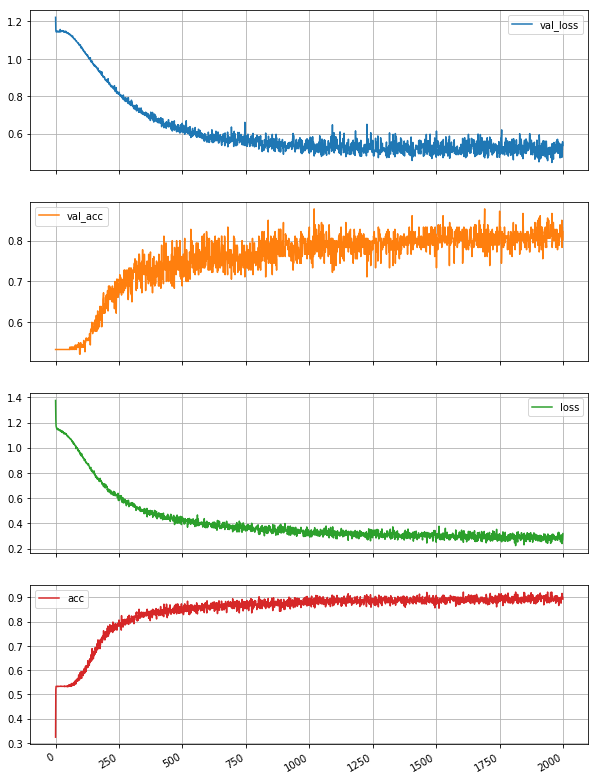

In [158]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [159]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [160]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "sassikes")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50291558")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 9  Correct :91
Testing Accuracy: 91.0
